Data Preprocessing:

In [ ]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
# Check for missing values in each column
print(df.isnull().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [5]:
# Check for outliers in all columns
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 *IQR)
        print(f"Outliers in {column}:")
        print(df.loc[~filter])

Outliers in ID#:
Empty DataFrame
Columns: [ID#, Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award?]
Index: []
Outliers in Balance:
       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
24      25   205651         500          1          1          1         4025   
32      33   276571           0          4          1          1        42044   
43      44   619393           0          3          1          1        15008   
45      46   288865         967          1          1          1        23600   
...    ...      ...         ...        ...        ...        ...          ...   
3754  3777   221543           0          1          1          1        10300   
3756  3779   203353           0          1          1          1        14000   
3772  3795   822321           0          5       

In [6]:
# Handling outliers can be tricky as it depends on the nature of the data. One common method is to replace outliers with the median. Here we use the IQR method to detect and replace outliers.
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 *IQR)
        df.loc[~filter, column] = df[column].median()

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

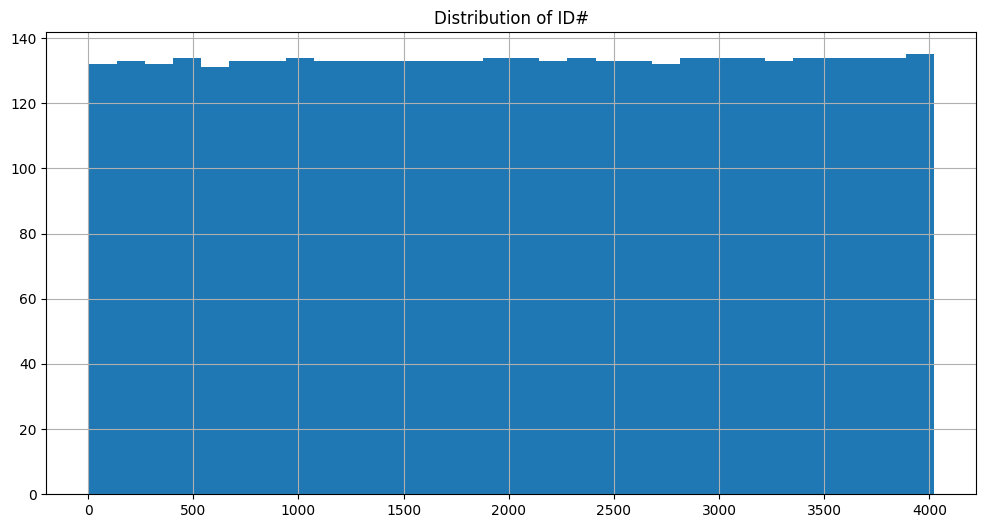

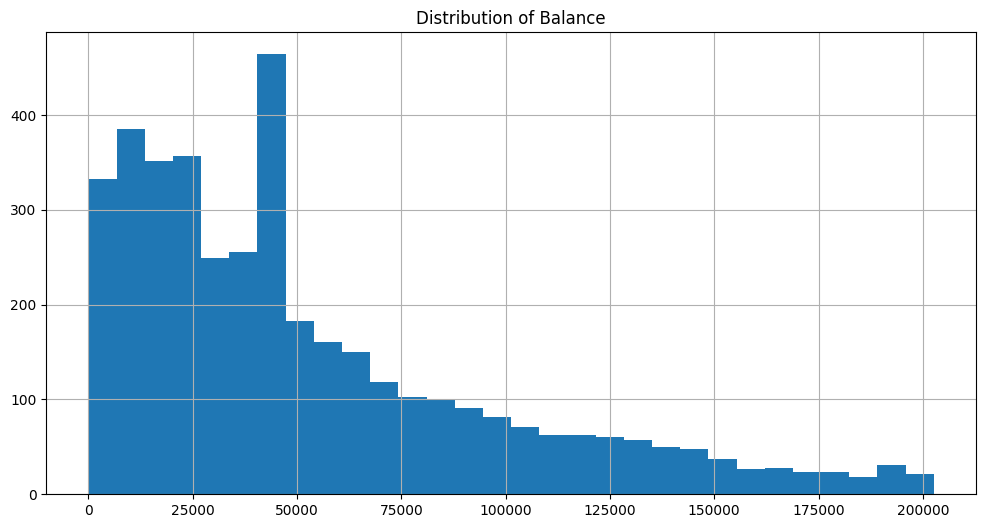

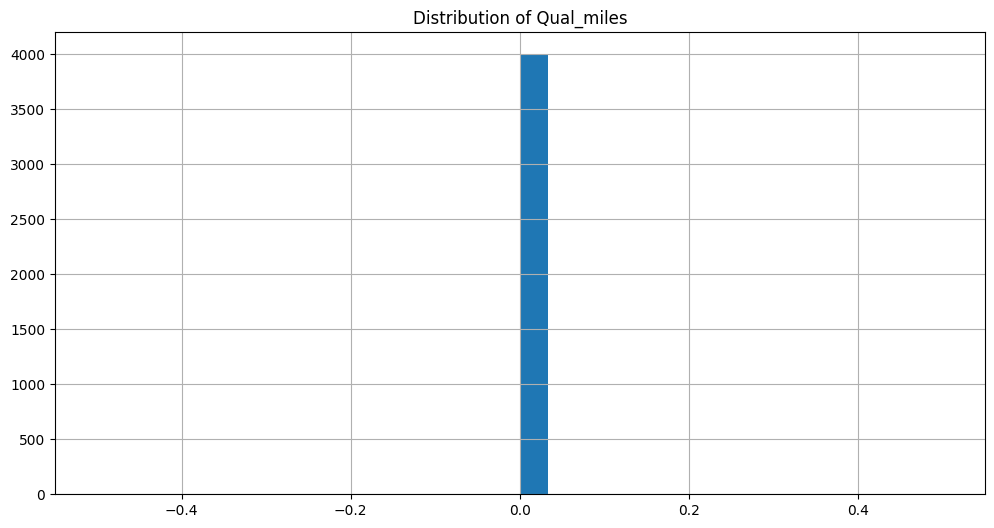

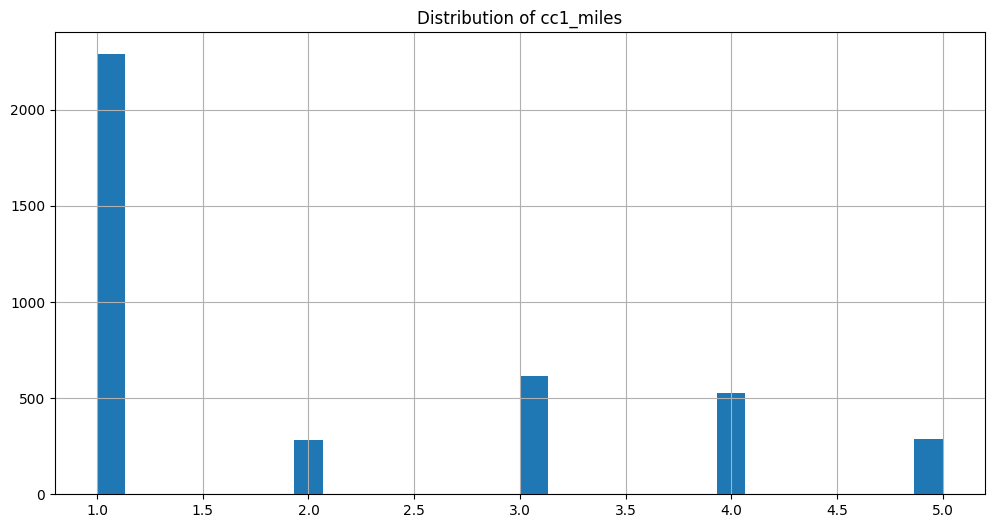

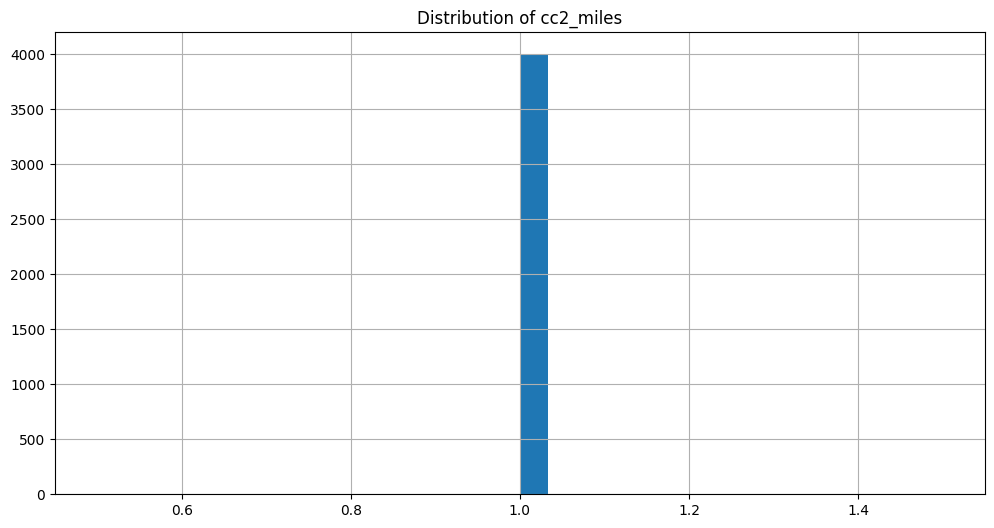

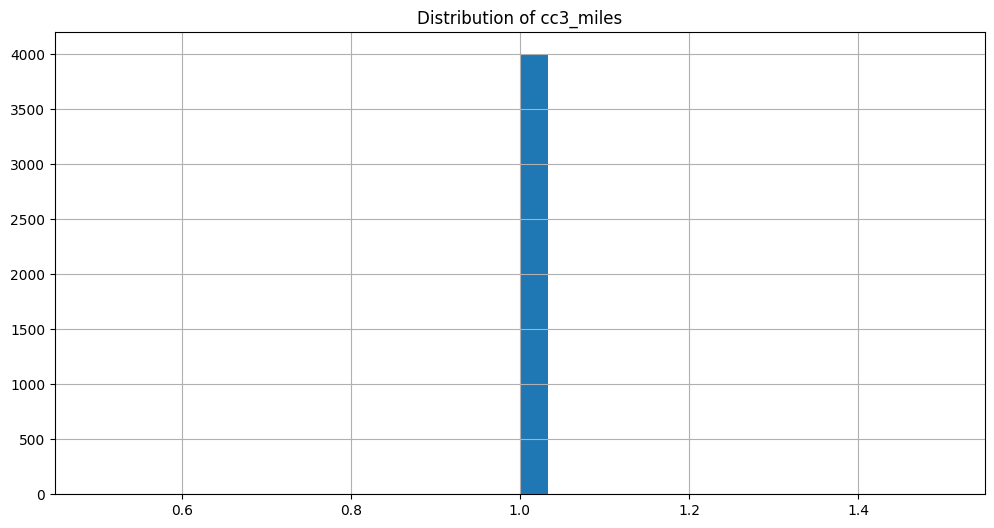

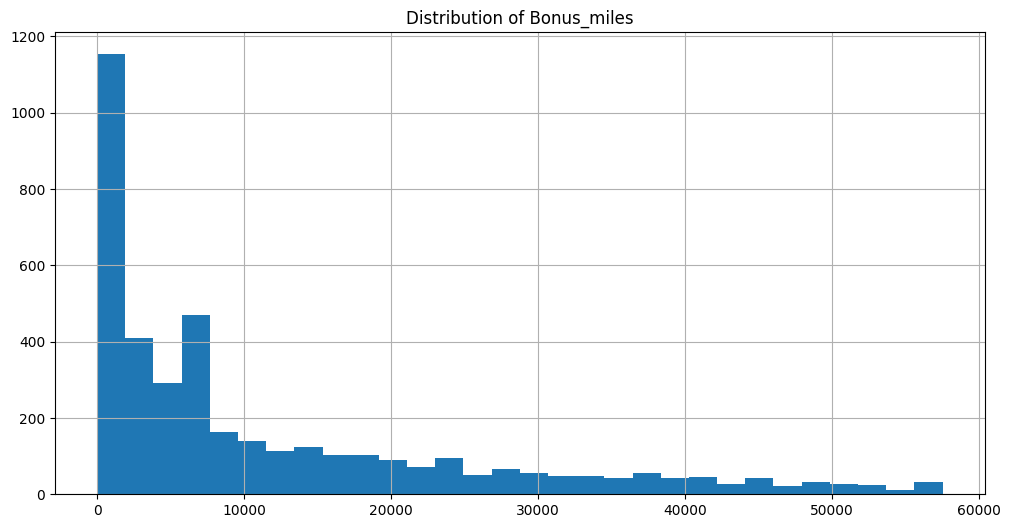

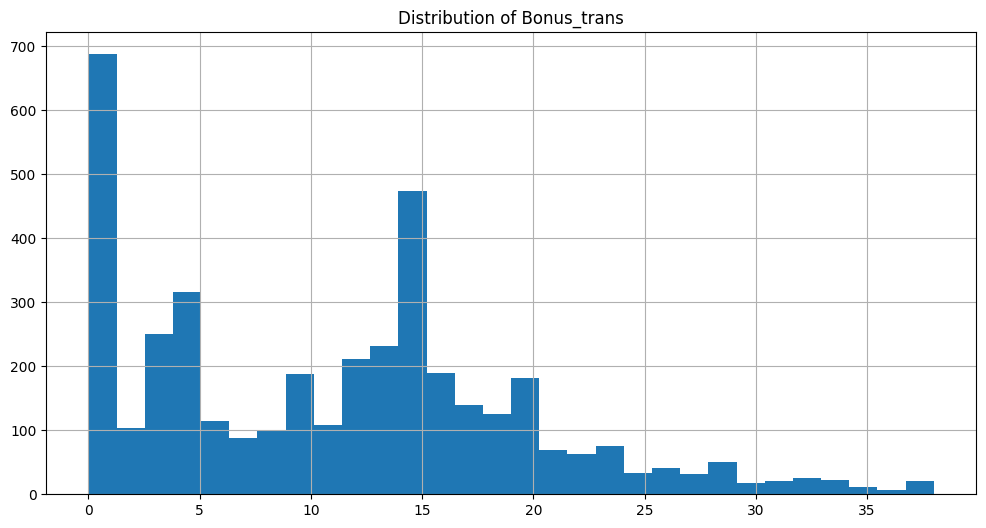

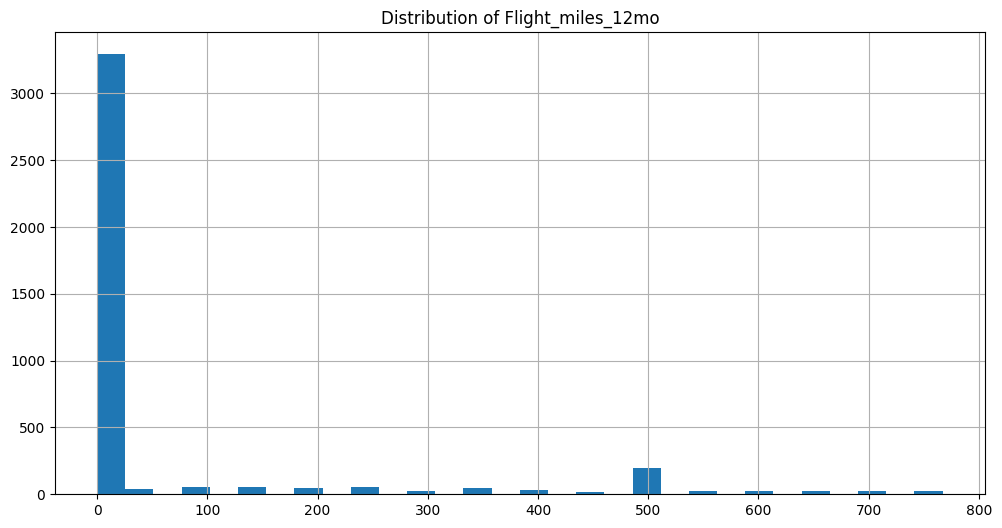

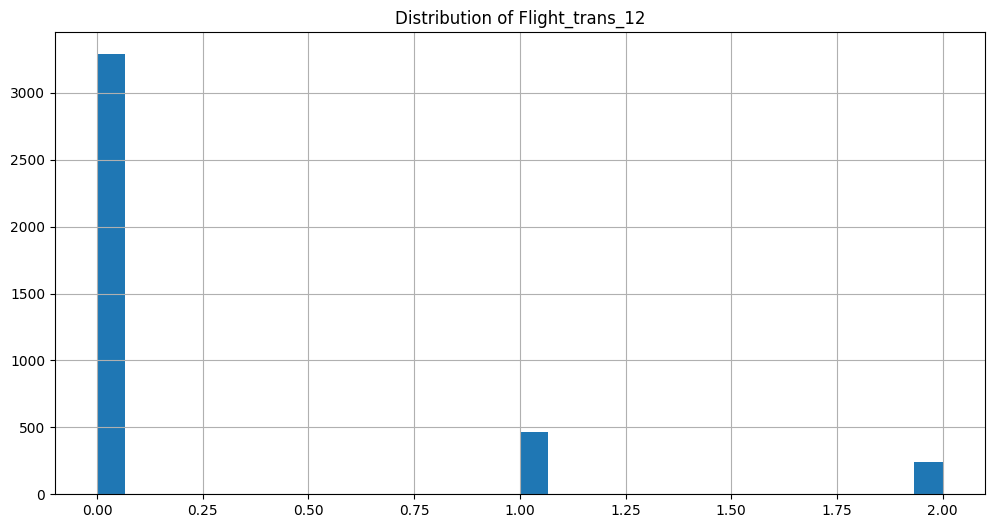

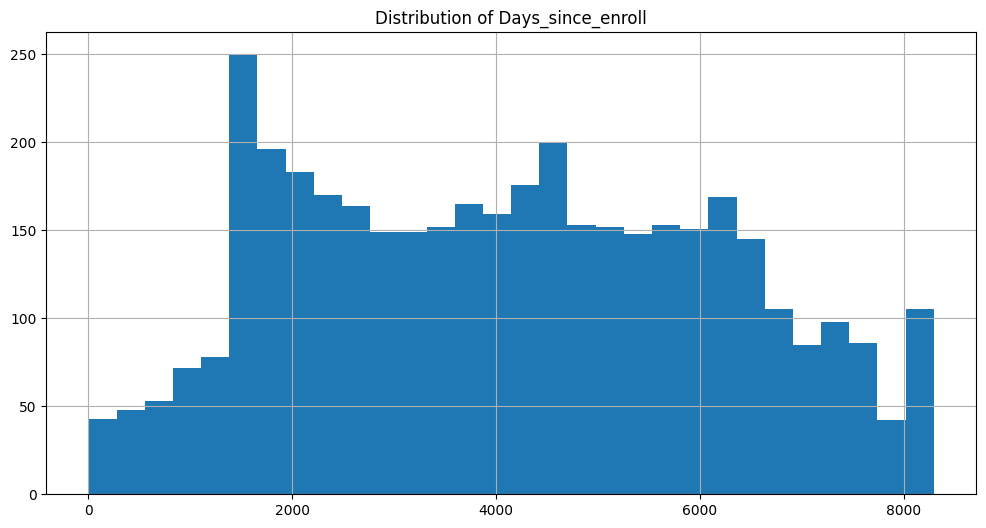

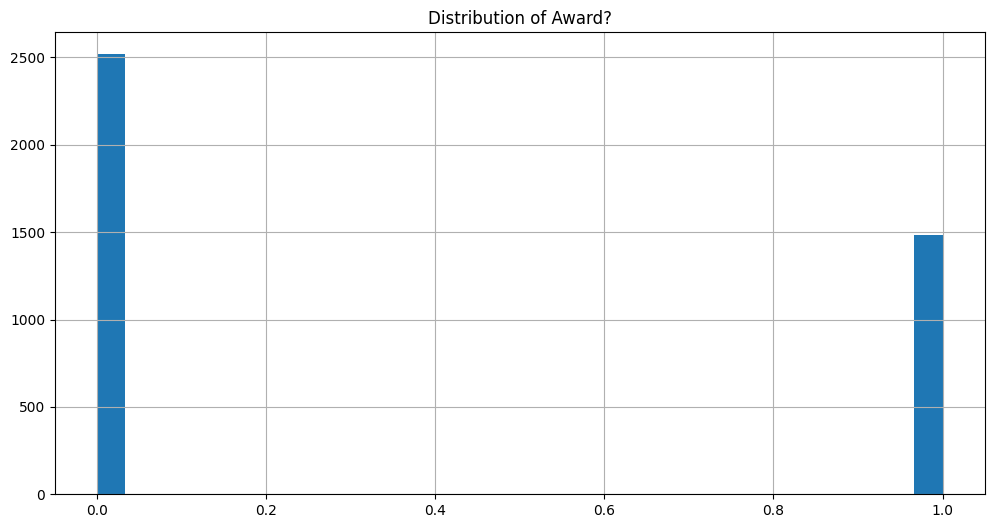

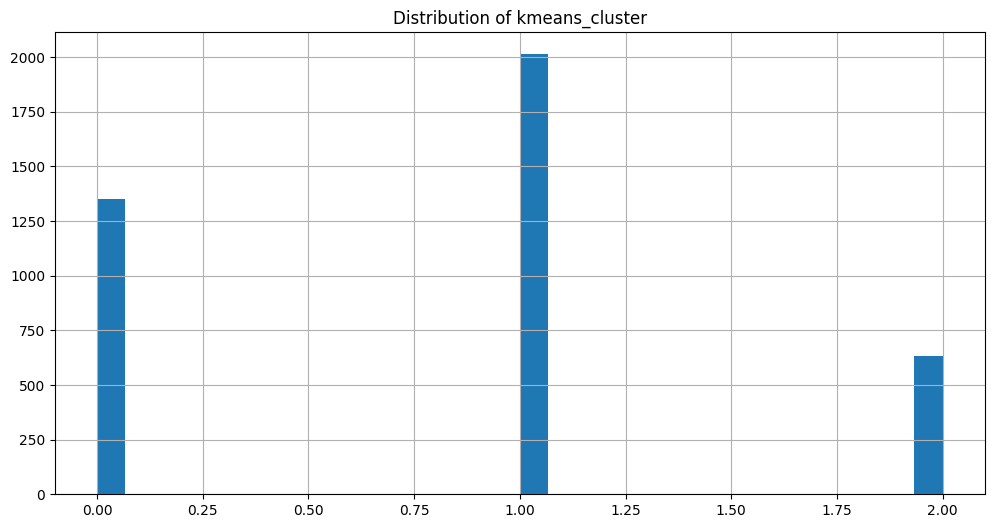

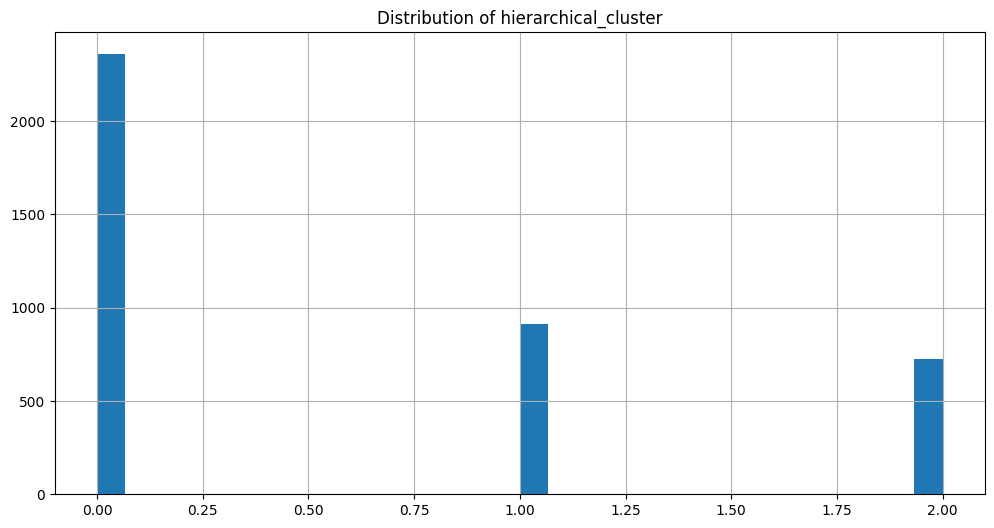

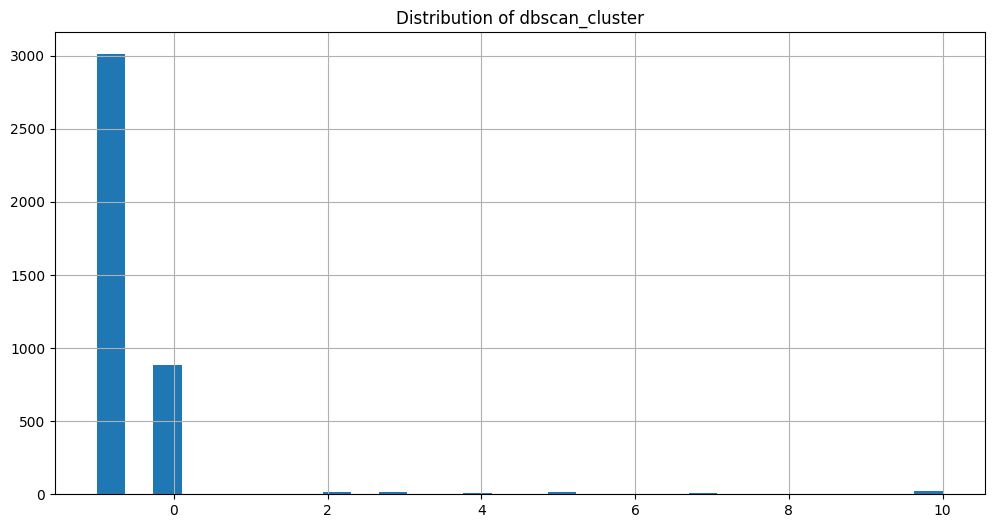

In [25]:
# Visualize the distribution of data for each feature
for column in df.columns:
    plt.figure(figsize=(12, 6))
    df[column].hist(bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


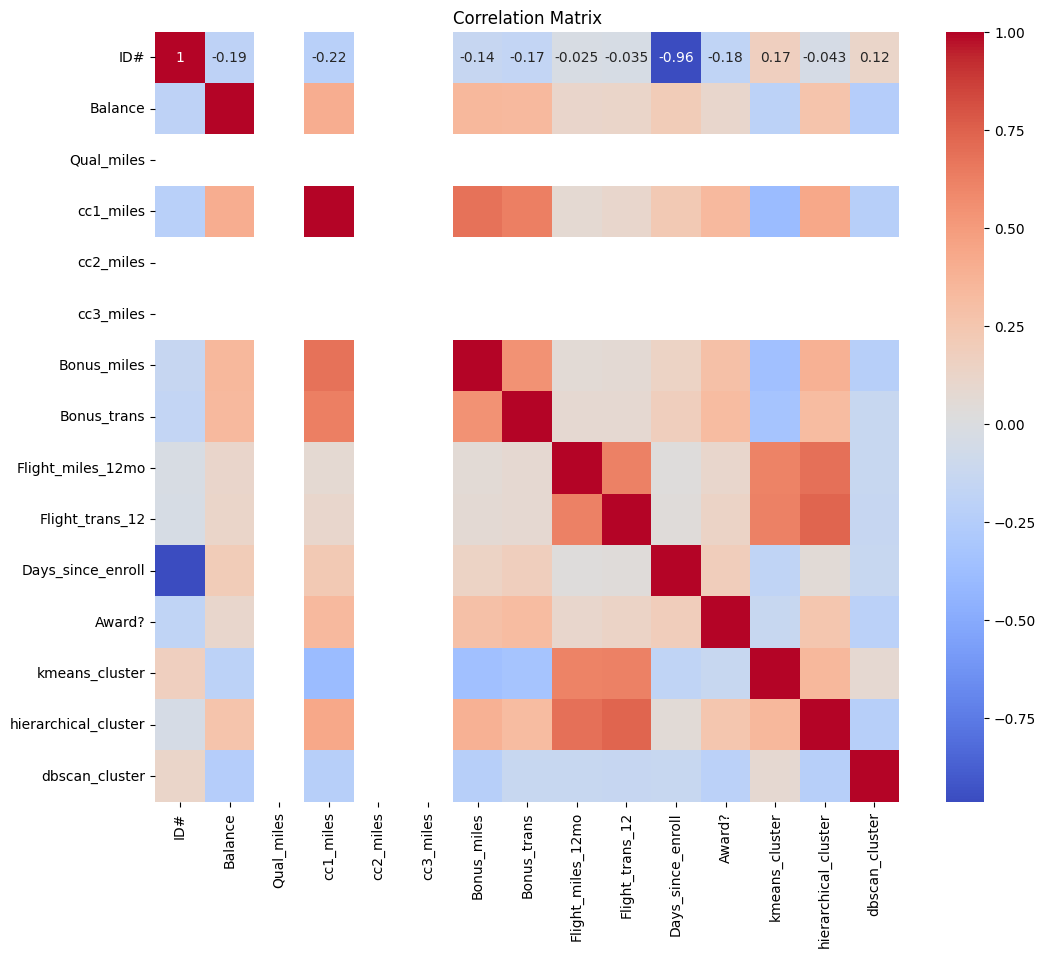

In [26]:
# Visualize the correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Implementing Clustering Algorithms:

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [11]:
# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [12]:
# Elbow curve to get the optimal number of clusters
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_scaled)
    sse[k] = kmeans.inertia_

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp,

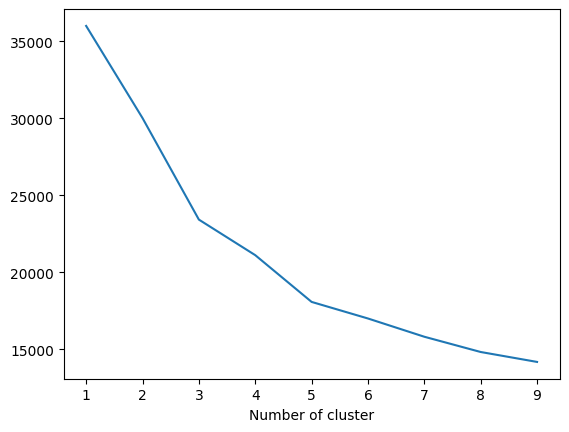

In [13]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [14]:
# Assuming the optimal number of clusters is 3
kmeans = KMeans(n_clusters=3, max_iter=1000)
kmeans.fit(df_scaled)

KMeans(max_iter=1000, n_clusters=3)

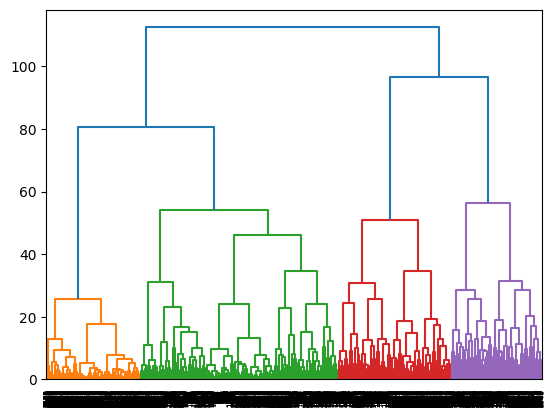

In [15]:
# Create a dendrogram
linked = linkage(df_scaled, 'ward')
dendrogram(linked)
plt.show()

In [16]:
# Cut the dendrogram to get the clusters
# Assuming we cut at n_clusters=3
clusters = cut_tree(linked, n_clusters=3).reshape(-1, )

In [17]:
# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(df_scaled)

DBSCAN(eps=0.3)

In [18]:
# Add the cluster labels to your original dataframe
df['kmeans_cluster'] = kmeans.labels_
df['hierarchical_cluster'] = clusters
df['dbscan_cluster'] = dbscan.labels_

Cluster Analysis and Visualization:

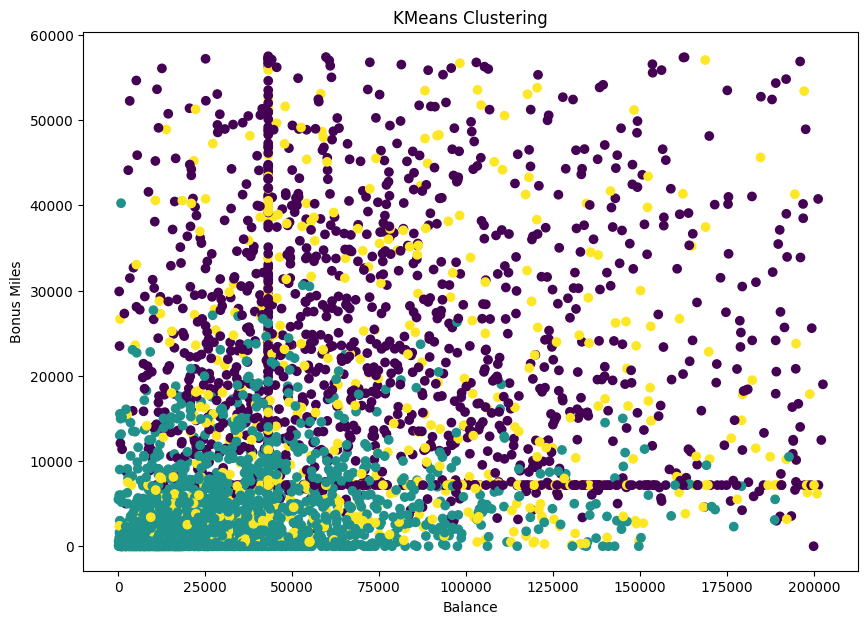

In [19]:
import matplotlib.pyplot as plt

# Visualize KMeans clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['kmeans_cluster'])
plt.title('KMeans Clustering')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.show()

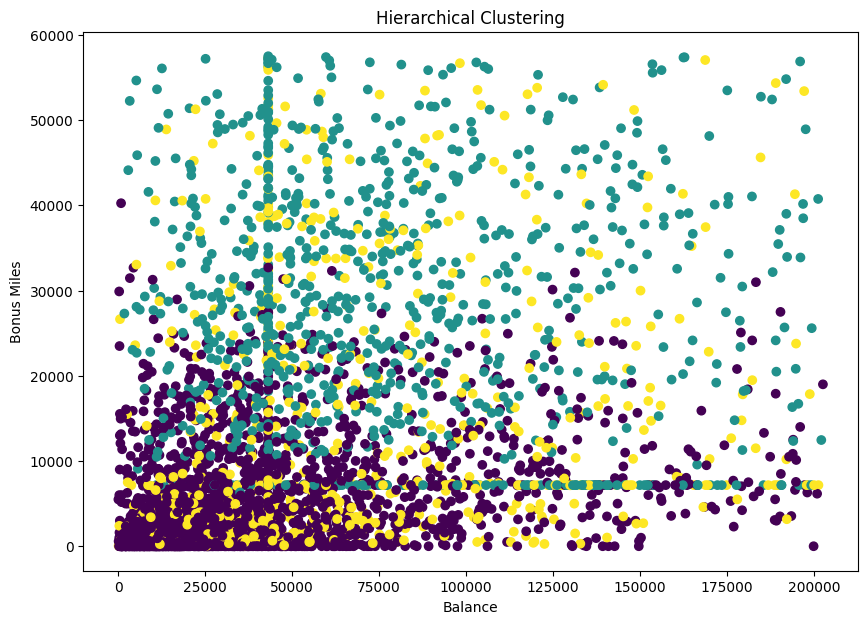

In [20]:

# Visualize Hierarchical clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['hierarchical_cluster'])
plt.title('Hierarchical Clustering')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.show()

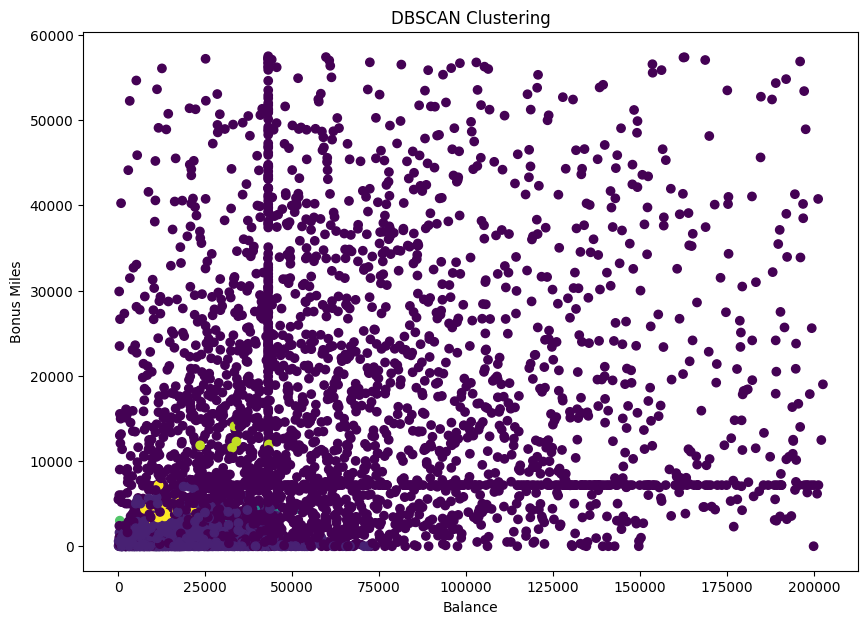

In [21]:

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['dbscan_cluster'])
plt.title('DBSCAN Clustering')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.show()

In [22]:
# Silhouette score for KMeans
print("Silhouette Score for KMeans: ", silhouette_score(df_scaled, kmeans.labels_))

Silhouette Score for KMeans:  0.26498661504847243


In [23]:
# Silhouette score for DBSCAN
print("Silhouette Score for DBSCAN: ", silhouette_score(df_scaled, dbscan.labels_))

Silhouette Score for DBSCAN:  -0.321720086946718
